# Assignment 2: Evaluating Linear Models

-----------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-------------------------------

**Your Name Here:** Nikhila Bommareddy

Put all of your skills to work on a basic modeling example! And let's see if we can use ChatGPT to help deepen your learning on this topic.

First things first, [Download the CT Real Estate Transactions data here](https://drive.google.com/file/d/12m6UYYt0Osa3JLLfPZRLlBipRUS9ixGd/view?usp=sharing), drag onto your Google Drive, make a shareable link and download it with `!gdown`, then read the dataframe as `df`. Then...


In [3]:
# here is a nice way to download as a shareable link - you just need to 'steal' the ID of the file and you can use gdown
# after you run this, the file will be downloaded to your local runtime and your are ready to rock!
# of course, local files on your runtime are deleted after you close the session, but this is OK.

# https://drive.google.com/file/d/1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ/view?usp=sharing
!gdown 1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ

Downloading...
From: https://drive.google.com/uc?id=1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ
To: /content/Real_Estate_Sales_2014-2016.csv
100% 15.4M/15.4M [00:00<00:00, 246MB/s]


In [4]:
import pandas as pd
df = pd.read_csv('Real_Estate_Sales_2014-2016.csv')


# Part 1a: Use ChatGPT to generate a regression recipe
I used to give this as the homework, where students had to reference my materials and documentation to solve this notebook. ChatGPT is actually pretty slick  and can generate a basic regression recipe for you. So... why not see what it can do?! Copy and paste these instructions into ChatGPT and ask it to write a Python code to solve this homework. Copy and paste it, update it if needed, and run it.

* Q1) Drop any rows where the `AssessedValue` is greater than 1 million USD
* Q2) Count how many rows have missing values, then drop any rows with missing values.
* Q3) Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such.
* Q4) Count how many unique values are in the `Town` column.
* Q5) Make a new dataframe called `tmp` of dummy variables for each value in the `Town` column. (hint: this dataframe should have somewhere around 127055 rows and 169 columns, one column for each town).
* Q6) Make a new dataframe called `X` that subsets the `AssessedValue` and `ListYear` from `df`, and concatenate with your dataframe called `tmp`. Hint: This dataframe should have 171 columns.
* Q7) Subset `SaleAmount` from `df` and assign to a variable called `y`.
* Q8) Convert `X` and `y` to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.
* Q9) Fit a linear regression model. Calculate mean absolute error for each partition.
* Q10) Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers. You should use a log axis each axis so that outliers don't dominate your plot.

* `plt.xscale('log')`
* `plt.yscale('log')`

Please use nice subheaders for each question so that your code is easy to review.



In [5]:
# students: paste both a screenshot of your prompt and code
# (for academic integrity) and your actual ChatGPT python code here

## Your ChatGPT Code
Don't just copy/paste as one cell, make nice subheaders for each question please.

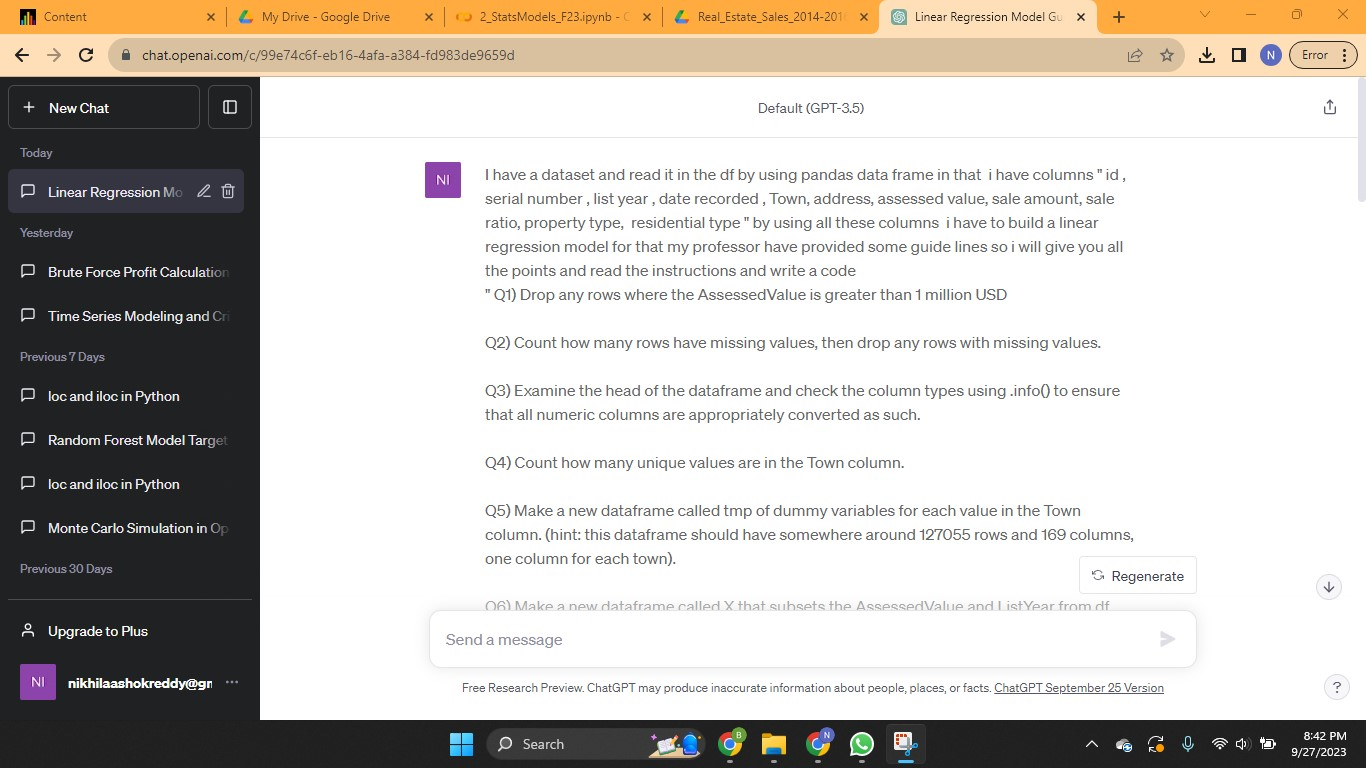

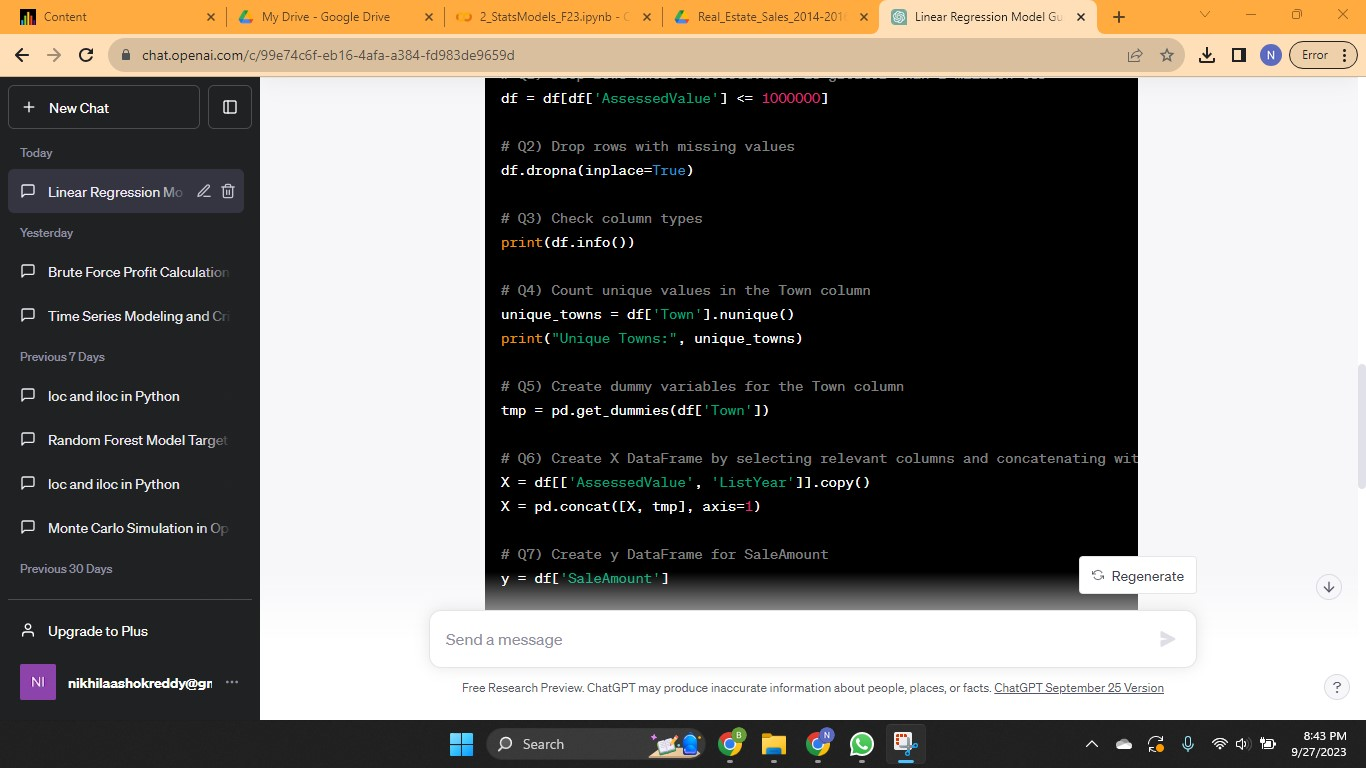

# Executing the chat gpt given code:
Importing all the required libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


loading the dataset

In [7]:
df = pd.read_csv('Real_Estate_Sales_2014-2016.csv')

Q1) Drop rows where AssessedValue is greater than 1 million USD

In [8]:
df = df[df['AssessedValue'] <= 1000000]


Q2) counting the rows that have missing values and dropping them

In [9]:
missing_values_in_assessed_value = df['AssessedValue'].isna().sum()
df.dropna(inplace=True)


q3) Examining the dataset

In [10]:
df.head()

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
1,2,14011,2014,1/14/2015,Andover,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family
2,3,15006,2015,11/30/2015,Andover,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family
3,4,14044,2014,9/28/2015,Andover,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family
4,5,14035,2014,8/10/2015,Andover,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family
5,6,15051,2015,9/28/2016,Andover,107 LAKESIDE DR,188400,226000.0,0.833628,Residential,Single Family


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               127055 non-null  int64  
 1   SerialNumber     127055 non-null  int64  
 2   ListYear         127055 non-null  int64  
 3   DateRecorded     127055 non-null  object 
 4   Town             127055 non-null  object 
 5   Address          127055 non-null  object 
 6   AssessedValue    127055 non-null  int64  
 7   SaleAmount       127055 non-null  float64
 8   SalesRatio       127055 non-null  float64
 9   PropertyType     127055 non-null  object 
 10  ResidentialType  127055 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 11.6+ MB


Q4) counting the unique values in the town column

In [12]:
unique_towns = df['Town'].nunique()
print("Unique Towns:", unique_towns)

Unique Towns: 169


Q5) Making a new dataframe of dummy variables for each value in the Town column

In [13]:
tmp = pd.get_dummies(df['Town'])

Q6)Making a new dataframe by subsetting the Assessed value and the List year in the df

In [14]:
X = df[['AssessedValue', 'ListYear']].copy()
X = pd.concat([X, tmp], axis=1)


Q7) subsetting the sale amount from the df and assigning it to the y variable

In [15]:
y=df['SaleAmount']

Q8) splitting the data

In [16]:
seed = 7654321
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


Q9)Fitting the linear regression model

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


observing the mean absolute error for model evaluation

In [18]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Mean Absolute Error (Train):", mae_train)
print("Mean Absolute Error (Test):", mae_test)

Mean Absolute Error (Train): 93077.25756584019
Mean Absolute Error (Test): 92950.9198133467


Q10) creating the Scatter plot to observe the actual and the predicted values

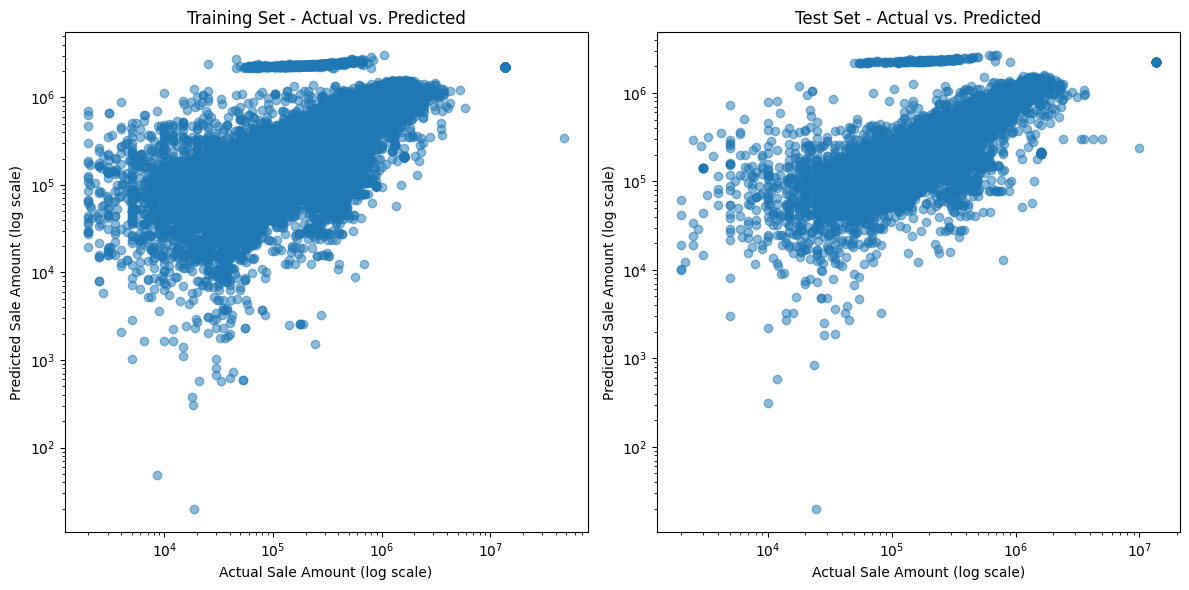

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(y_train, y_train_pred, alpha=0.5, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Actual Sale Amount (log scale)")
plt.ylabel("Predicted Sale Amount (log scale)")
plt.title("Training Set - Actual vs. Predicted")

plt.subplot(122)
plt.scatter(y_test, y_test_pred, alpha=0.5, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Actual Sale Amount (log scale)")
plt.ylabel("Predicted Sale Amount (log scale)")
plt.title("Test Set - Actual vs. Predicted")

plt.tight_layout()
plt.show()

# Part 1b: Compare and contrast with Dave's regression examples

You now have an AI-generated code vs. the class materials - and I think you would agree both are pretty good! Take some time to the ChatGPT script vs. the class notes and come up with five observations of what is similar vs. different between the two examples. What is in Dave's materials that are not in the AI-generated code? And vice-versa?

### Observation 1

In my first observation initially as a humans we must have an idea of what we need to predict. Mainly what are the independent variables and what variables are useful for predicting the independent feature. To the AI i have given all the instructions like handling the missing values and grabing only required data and building the separate table by using the unique values in Town cloumn. May be because of that it has given the exact code. In real life we just have only the dataset. By observing that we must take the insights from that data and have an domain knowledge, accordingly we have to work on it. Initially i have observed that.  

### Observation 2
In my second observation for handling the missing values, as i have given instructions to drop the missing values it blindly dropped the missing values. I think this is not the correct approach to handle the missing the values, as per my knowledge i think if the feature is important to include in a model prediction we must replace them. As Dave explained it clearly is if its numerical variable we have to replace with the Mean value and if its categorial variable we have to replace with the Mode. Here AI is working as per the instructions provided it is not thinking about the importance of the features.

# Observation 3
In my Third observation we haven't talked about Scalling the features. which was explained by the professor clearly. AI have build the model as per the instructions given it didn't even think about the scalling the feature. But dave has explained it clearly that importance of scalling and how to do Min/Max scaler and  Standard scaler. In my predictive modelling class i haven't understood the importance of scalling. But now after going through all the class materials i could understand and steps to do scalling. first we need to split the data and then x-train data have to use fit.transform() and then on x-test data we have to use only transform() function to scale the data. we can do that by using the manually also which was explained by the professor.

# Observation 4
In my 4 th observation grabbing the required data to build the model is also crucial. May be building the model could take only 2 lines of code but performing the EDA part and the data preprocessing is crucial for building the best model. After building the model we have to evaluate it which is crucial for our work, This could be done by the error metrics which was explained by the professor, Regression error metrics Notebook. There in that notebook I have understood the r-square and mean absolute error and mean square error. Among all these metrics i could understand that the importance of the mean squared error and why to observe that. Another point that i learn was To know the model is underfit or else over fitting basically we have to check the is having bias aor not that we have to evaluate which could be evaluated by the RMSE values that i have understood by from the same notebook.

# Observation 5
In my 5 th observation i could understand that the importance of the building the scatter plot between the actual values and the predicted values. By using the scatter plot we could understand the difference between the predicted values and observed values.By seeing the scatter plot we could evaluate and analyze the model by x-training and x-test data. Here in this model the RMSE value is 93077 that mean there is a error in the model, that mean it is not predicting the accurate results.

# Part 2a: Now ask ChatGPT to generate a classification recipe
With you active ChatGPT open, ask this question (or something similar):

*'Instead of a regression problem, can you update the script to be a classification problem where the target variable is 0/1 based on if the AssessedValue is greater than the mean value in that column?'*

## Your ChatGPT Screenshot
Make sure the screenshot of time and date is included in the image.

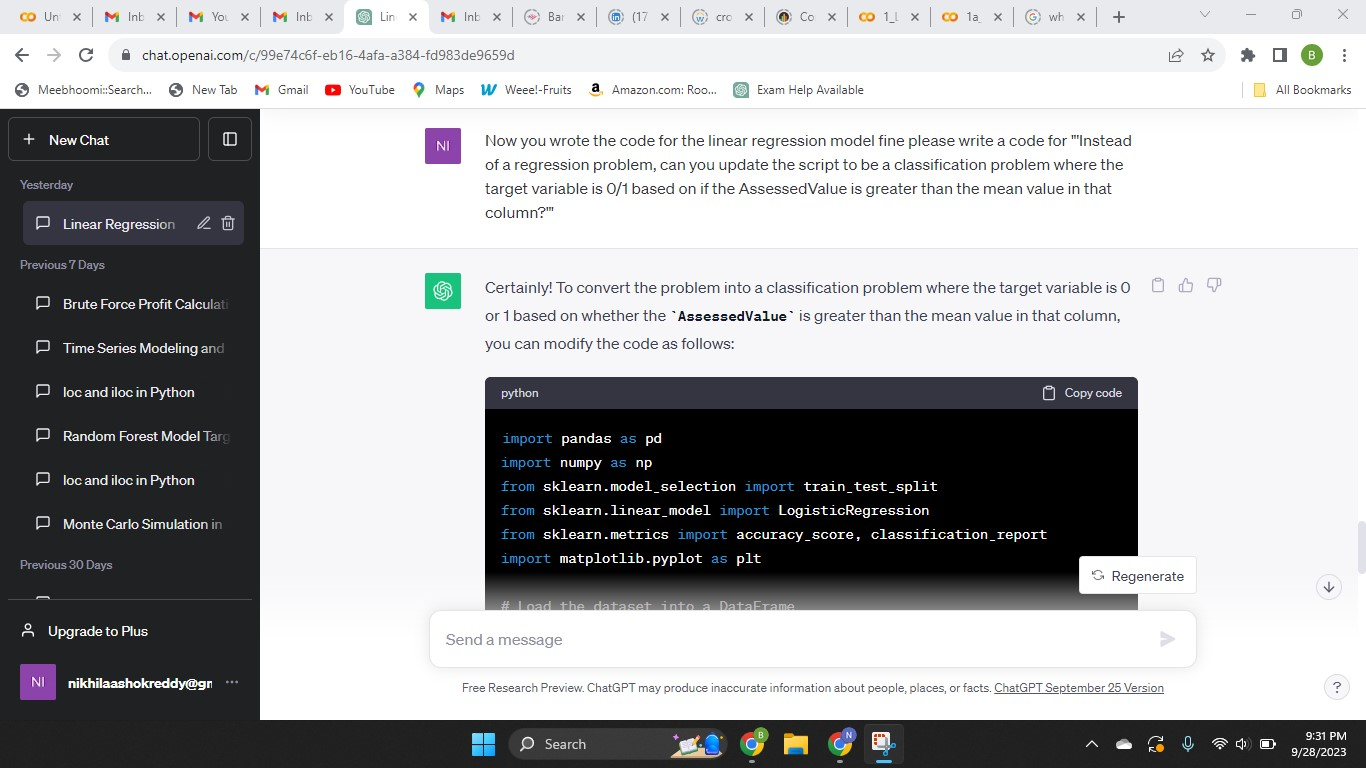

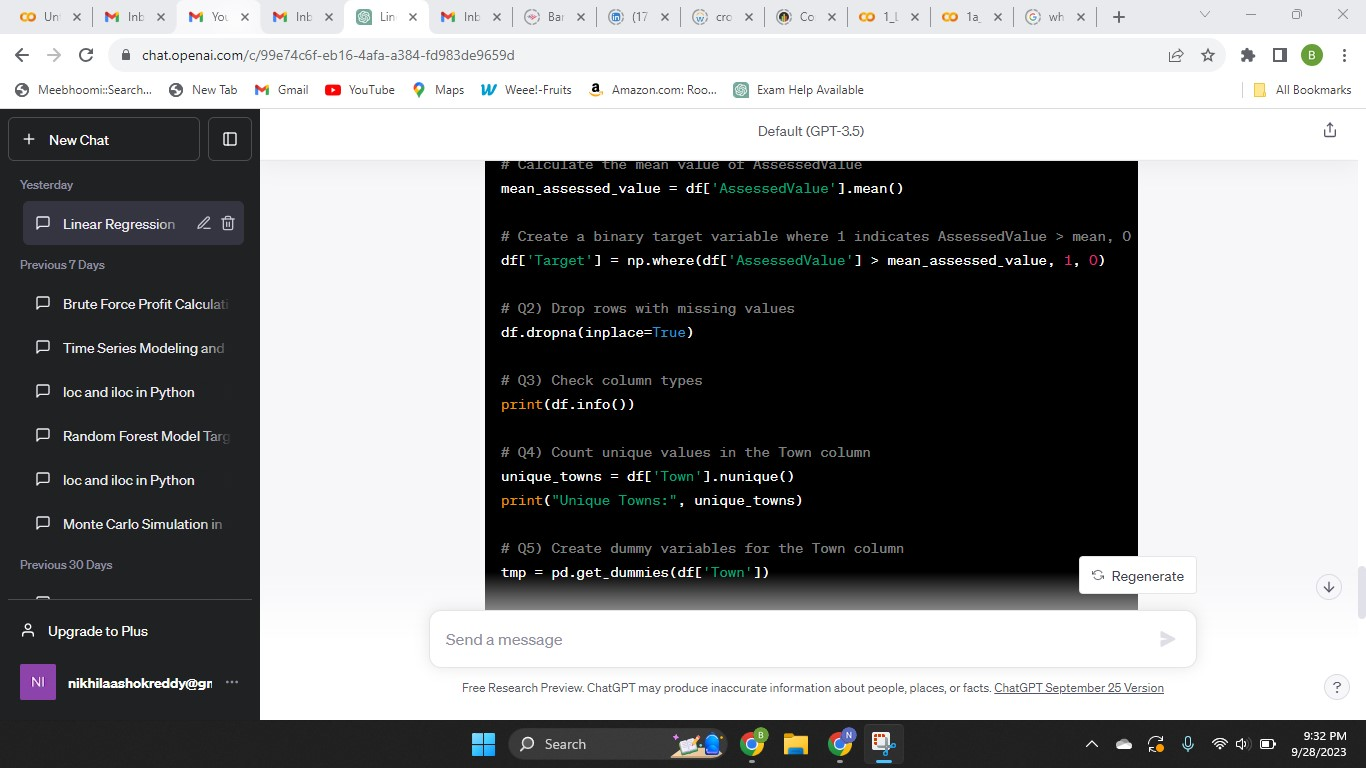

## Your ChatGPT Code
Don't just copy/paste as one cell, make nice subheaders for each question please.

calculating the mean for the Assessed value

In [20]:
mean_assessed_value = df['AssessedValue'].mean()


creating the binary variable:

In [21]:
df['Target'] = np.where(df['AssessedValue'] > mean_assessed_value, 1, 0)

Counting and dropping the missing value

In [22]:
num_missing = df.isnull().sum().sum()
df = df.dropna()

checking the column type

In [23]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 127055 entries, 1 to 145941
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               127055 non-null  int64  
 1   SerialNumber     127055 non-null  int64  
 2   ListYear         127055 non-null  int64  
 3   DateRecorded     127055 non-null  object 
 4   Town             127055 non-null  object 
 5   Address          127055 non-null  object 
 6   AssessedValue    127055 non-null  int64  
 7   SaleAmount       127055 non-null  float64
 8   SalesRatio       127055 non-null  float64
 9   PropertyType     127055 non-null  object 
 10  ResidentialType  127055 non-null  object 
 11  Target           127055 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 12.6+ MB
None


Counting the unique values in the town column

Converting date columns

In [24]:
df['DateRecorded'] = pd.to_datetime(df['DateRecorded'])
df['ListYear'] = df['DateRecorded'].dt.year


In [25]:
unique_town_count = df['Town'].nunique()
print("Unique Towns:", unique_town_count)

Unique Towns: 169


creating the dummy variables

In [26]:
tmp = pd.get_dummies(df['Town'])


Creating X and Y variables

In [27]:
X = df.drop(columns=['Target','AssessedValue','DateRecorded','Town','Address','PropertyType','ResidentialType'])
y = df['Target']

Splitting the data

In [28]:
seed=7654321
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127055 entries, 1 to 145941
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               127055 non-null  int64         
 1   SerialNumber     127055 non-null  int64         
 2   ListYear         127055 non-null  int64         
 3   DateRecorded     127055 non-null  datetime64[ns]
 4   Town             127055 non-null  object        
 5   Address          127055 non-null  object        
 6   AssessedValue    127055 non-null  int64         
 7   SaleAmount       127055 non-null  float64       
 8   SalesRatio       127055 non-null  float64       
 9   PropertyType     127055 non-null  object        
 10  ResidentialType  127055 non-null  object        
 11  Target           127055 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 12.6+ MB


Fitting a logistic regression

In [30]:
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)

LogisticRegression(random_state=7654321)

Predicting the training and test data

In [31]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


Observing the Accuracy

In [32]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy (Train):", accuracy_train)
print("Accuracy (Test):", accuracy_test)


Accuracy (Train): 0.8469757191767345
Accuracy (Test): 0.8437290936995789


Confusion Matrix

In [33]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[16250   330]
 [ 3641  5190]]


# Part 2b: Compare and contrast with Dave's classification examples

Again, you now have an AI-generated code vs. the class materials - and I think you would agree both are pretty good! Take some time to the ChatGPT script vs. the class notes and come up with five observations of what is similar vs. different between the two examples. What is in Dave's materials that are not in the AI-generated code? And vice-versa?

### Observation 1
My first observation after going through all the course materials, I could understand that importance of the creating the dummy variables and gathering the required data that in the large datasets we need only some variables to build a model. Gathering that data is crucial, but i can understand that it is easier to do so by using PCA. Finally before building the model i could understand the importance of feature engineering. Data preprocessing impportance i could understand. AI given code actually it is building the model in such a way that without any these steps. To get a good model better accuracy data preprocessing steps are essential.

Observation 2

In my second observation in the course materials i could understand that the importance of Classification error metrics. after building the model we have to analyze how accurate the model is which could be done by the Precision and Recall. By observing the confusion matrix we could analyze it.

Observation 3

In my third observation AI generated code haven't done the scalling procedure but in the Class materials scalling procedure has been done. The importance of scalling the x-variables is, it will give us best model.

Observation 4

In my fourth observation fitting the model is one line of code but making the accurate model is crucial. By observing the confusion matrix we can calculate the precision and recall values, which tells us the False positive values and the true negative values.

Observation 5

In my fourth observation the importance of F1 Score how it is important to evaluate the model. while splitting the data x-variable should not contain the target leakage which changes the model abruptly. while writting the code first i have included the Assessed value to predict so i got the different values which the model is totally messed up. Then i have modified the AI generated code i have deleted the Assessed value from the x. My values got changed.